# I. Perkenalan
Nama        : Fadhilah Amani Alam Aulia

Batch       : 15

Dataset     : Penggunaan Transportasi Uber dan Lyft di Boston, MA

Objective   : Melakukan prediksi harga perjalanan platform ride-hailing 

# II. Import Libraries
Bagian ini berisi syntax untuk mengimport library yang dibutuhkan

In [2]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# III. Data Loading
Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading yang dilakukan adalah:
- Mengakses file dataset
- Mengganti nama kolom
- Melihat 10 baris pertama pada dataset
- Melihat 10 baris terakhir pada dataset
- Mengecek ukuran dataset

In [3]:
# Mengakses file dataset

data = pd.read_csv('rideshare_kaggle.csv')
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
# Menyalin file dataset ke dataset baru

data_copy = data.copy()

In [5]:
# Mengganti nama kolom

data.rename(columns={'datetime': 'date/time', 'source': 'origin'}, inplace=True)
data

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [6]:
# Melihat 10 baris pertama pada dataset

data.head(10)

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


In [7]:
# Melihat 10 baris terakhir pada dataset

data.tail(10)

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# Mengecek ukuran dataset dengan `.info()`

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   date/time                    693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   origin                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berdasarkan info di atas, diketahui bahwa pada dataset terdiri dari 57 kolom, 693071 baris, dan 3 data type, yaitu float64, int64, dan object. Lalu dataset ini menghabiskan memory sebesar 301.4 MB.

# IV. Exploratory Data Analysis (EDA)


In [9]:
# Menampilkan data kolom cab_type Lyft

data[data ['cab_type'] == 'Lyft']

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693042,086e7cda-2b2d-4736-9d5f-0cd234e04e63,1.543453e+09,1,29,11,2018-11-29 01:03:40,America/New_York,Theatre District,Fenway,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693043,177a946d-c7c8-4334-a97a-a8a48efb1bc0,1.543453e+09,1,29,11,2018-11-29 01:03:40,America/New_York,Theatre District,Fenway,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693048,871dc1be-d51e-4334-9217-1a6cd00d5058,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Theatre District,Fenway,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693051,aa4e5808-7357-49d3-b539-bd04d4815665,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Theatre District,Fenway,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800


In [10]:
# Menampilkan data kolom cab_type Uber

data[data ['cab_type'] == 'Uber']

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [11]:
# Melakukan grouping data berdasarkan data cab_type dan rata-rata jarak yang ditempuh

df = data.groupby('cab_type')['distance'].mean().to_frame().reset_index()
df.columns = ['cab_type', 'average distance']
df

,cab_type,average distance
0,Lyft,2.186976
1,Uber,2.191386


In [12]:
# Melakukan grouping data berdasarkan data cab_type dan rata-rata harga

df = data.groupby('cab_type')['price'].mean().to_frame().reset_index()
df.columns = ['cab_type', 'average price']
df

,cab_type,average price
0,Lyft,17.351396
1,Uber,15.795343


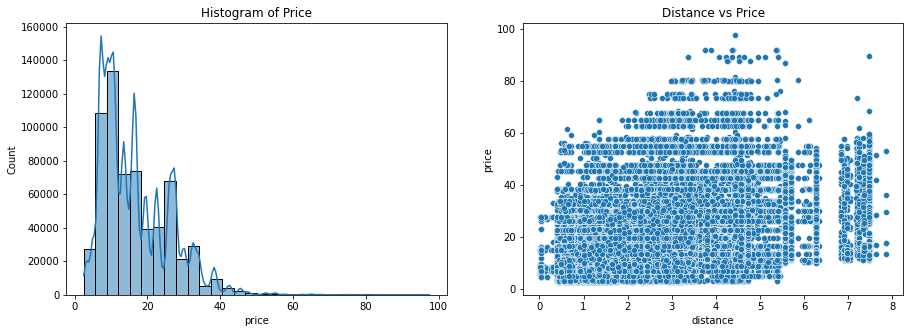

In [13]:
# Membuat visualisasi sederhana mengenai data

plt.figure(figsize=(15, 5))                    
plt.subplot(1, 2, 1)                           
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Distance vs Price')
plt.show()


Berdasarkan data-data di atas, diketahui bahwa terdapat 307408 data untuk Lyft dan 385663 data untuk Uber. Rata-rata jarak yang ditempuh oleh Lyft adalah sekitar 2.18 km, sedangkan untuk Uber adalah sekitar 2.19 km. Lalu, rata-rata harga Lyft adalah sebesar $17.3 dan untuk Uber adalah $15.7. 

Lalu berdasarkan grafik histogram di atas, dapat diketahui bahwa data untuk price memiliki distribusi yang tidak normal, sehingga data tidak terdistribusi secara merata. Dan untuk grafik persebaran data distance dan price, dapat dilihat bahwa terdapat beberapa data outlier pada kedua data tersebut.

# V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
1. Mengambil data untuk model inference
2. Memisahkan antara X (Features) and y (Target)
3. Handling Data Outlier
4. Handling Missing Values
5. Feature Selection
6. Memisahkan antara kolom Numerikal dan kolom Kategorikal
7. Feature Scaling
8. Feature Encoding
9. Menggabungkan kolom Numerikal dan Kolom Kategorikal

## V.1 Mengambil Data untuk Model Inference

In [14]:
# Mengambil data sample untuk Model Inference

dt_inf = data.sample(10, random_state=6)
dt_inf

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
692446,07fa655a-6d14-493d-a327-82b9975f23fd,1.543622e+09,23,30,11,2018-11-30 23:48:04,America/New_York,Financial District,South Station,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
569302,989cd358-bd98-4721-8f44-d5545bace91d,1.543550e+09,3,30,11,2018-11-30 03:48:05,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1543510800,35.02,1543550400,44.80,1543510800,30.81,1543550400,38.51,1543510800
8909,2d0fe69e-4a02-4dff-8d06-0d8728dc9525,1.545150e+09,16,18,12,2018-12-18 16:25:09,America/New_York,Financial District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
537514,3423fd48-90f5-4ade-bdf5-e1041a0eb914,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,North Station,Haymarket Square,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
585253,b408b575-3120-4ca3-ab7b-54577f04d357,1.543341e+09,17,27,11,2018-11-27 17:51:23,America/New_York,Fenway,Financial District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
455664,1b2ace02-9644-4b61-89a2-766764c5f780,1.543829e+09,9,3,12,2018-12-03 09:18:04,America/New_York,North Station,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
92134,789f1a48-6800-441e-893f-8a9f1edc23e4,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,South Station,Back Bay,Uber,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
98939,48a12c63-427e-4757-921e-2caedc9d6ef7,1.543899e+09,4,4,12,2018-12-04 04:48:02,America/New_York,Financial District,North End,Lyft,...,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800
461141,2d87519c-9686-4d1d-9d12-f36e2bf0ec01,1.544958e+09,10,16,12,2018-12-16 10:55:10,America/New_York,North Station,Fenway,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
356228,dc2d93b2-1776-4d31-ae03-580179369cbc,1.544868e+09,10,15,12,2018-12-15 10:00:10,America/New_York,Back Bay,Fenway,Lyft,...,0.0087,1544893200,39.44,1544929200,54.38,1544896800,36.56,1544929200,53.71,1544896800


In [15]:
# Menghapus data Inference-Set pada dataset

dt_train_test = data.drop(dt_inf.index)
dt_train_test

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [16]:
# Melakukan reset index untuk meminimalisir error

dt_train_test.reset_index(drop = True, inplace = True)
dt_inf.reset_index(drop = True, inplace = True)
dt_inf

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,07fa655a-6d14-493d-a327-82b9975f23fd,1.543622e+09,23,30,11,2018-11-30 23:48:04,America/New_York,Financial District,South Station,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
1,989cd358-bd98-4721-8f44-d5545bace91d,1.543550e+09,3,30,11,2018-11-30 03:48:05,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1543510800,35.02,1543550400,44.80,1543510800,30.81,1543550400,38.51,1543510800
2,2d0fe69e-4a02-4dff-8d06-0d8728dc9525,1.545150e+09,16,18,12,2018-12-18 16:25:09,America/New_York,Financial District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
3,3423fd48-90f5-4ade-bdf5-e1041a0eb914,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,North Station,Haymarket Square,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
4,b408b575-3120-4ca3-ab7b-54577f04d357,1.543341e+09,17,27,11,2018-11-27 17:51:23,America/New_York,Fenway,Financial District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
5,1b2ace02-9644-4b61-89a2-766764c5f780,1.543829e+09,9,3,12,2018-12-03 09:18:04,America/New_York,North Station,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
6,789f1a48-6800-441e-893f-8a9f1edc23e4,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,South Station,Back Bay,Uber,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
7,48a12c63-427e-4757-921e-2caedc9d6ef7,1.543899e+09,4,4,12,2018-12-04 04:48:02,America/New_York,Financial District,North End,Lyft,...,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800
8,2d87519c-9686-4d1d-9d12-f36e2bf0ec01,1.544958e+09,10,16,12,2018-12-16 10:55:10,America/New_York,North Station,Fenway,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
9,dc2d93b2-1776-4d31-ae03-580179369cbc,1.544868e+09,10,15,12,2018-12-15 10:00:10,America/New_York,Back Bay,Fenway,Lyft,...,0.0087,1544893200,39.44,1544929200,54.38,1544896800,36.56,1544929200,53.71,1544896800


## V.2 Memisahkan antara `X` (Features) dan `y` (Target)
Hal yang dilakukan pada bagian ini adalah :
- Split antara X (Features) dan y (Target)
- Split antara data Train-Set dan Test-Set

In [17]:
# Split antara 'X' (Features) dan 'y' (Target)

X = dt_train_test.drop('price', axis=1)
y = dt_train_test['price']
X

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693056,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693057,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693058,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693059,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693061 entries, 0 to 693060
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693061 non-null  object 
 1   timestamp                    693061 non-null  float64
 2   hour                         693061 non-null  int64  
 3   day                          693061 non-null  int64  
 4   month                        693061 non-null  int64  
 5   date/time                    693061 non-null  object 
 6   timezone                     693061 non-null  object 
 7   origin                       693061 non-null  object 
 8   destination                  693061 non-null  object 
 9   cab_type                     693061 non-null  object 
 10  product_id                   693061 non-null  object 
 11  name                         693061 non-null  object 
 12  distance                     693061 non-null  float64
 13 

Berdasarkan data di atas, dapat dilihat bahwa kolom 'price' telah dihapus dari X

In [19]:
# Split antara Train-Set dan Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

print('Train Size   : ', X_train.shape)
print('Test Size    : ', X_test.shape )

Train Size   :  (554448, 56)
Test Size    :  (138613, 56)


Berdasarkan data di atas, diketahui bahwa data Train-Set terdiri dari 554448 baris dan 56 kolom. Sedangkan data Test-Set adalah 138613 baris dan 56 kolom.

## V.3 Handling Data Outlier

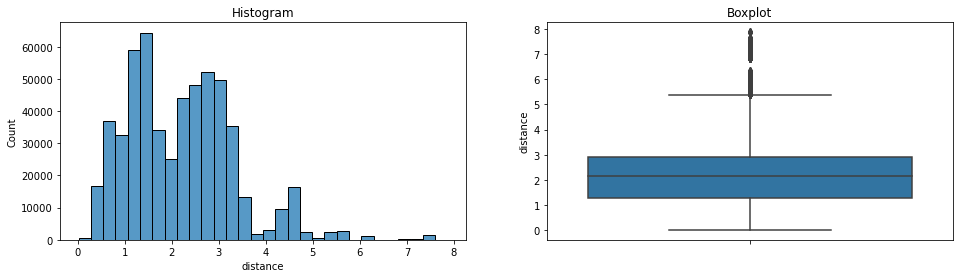


Skewness Value :  0.8381818559296961


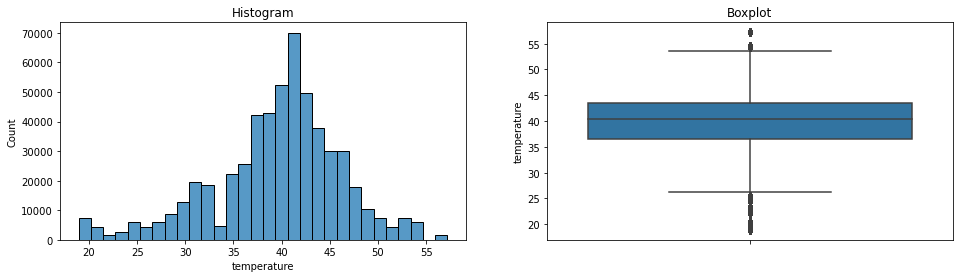


Skewness Value :  -0.6080448985871998


In [20]:
# Membuat fungsi untuk pembuatan histogram dan boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Mengecek apakah terdapat data outlier pada variabel 'distance' dan 'temperature'

diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

diagnostic_plots(X_train, 'temperature')
print('\nSkewness Value : ', X_train['temperature'].skew())

Pada grafik histogram di atas, dapat diketahui bahwa nilai skewness pada 'distance' adalah sekitar 0.83 dan pada 'temperature' adalah sekitar -0.6, yang berarti kedua data tersebut tidak terdistribusi secara normal.Lalu pada grafik boxplot dapat diketahui bahwa terdapat data outlier pada kedua variabel tersebut.

In [21]:
# Membuat fungsi untuk menghitung nilai IQR, lower_boundary, dan upper_boundary

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# Mengecek nilai data outlier pada variabel 'distance' dan 'temperature'

distance_upper, distance_lower = find_skewed_boundaries(X_train, 'distance', 1.5)
print('Nilai Batas Atas Distance     : ', distance_upper)
print('Nilai Batas Bawah Distance    : ', distance_lower)

temperature_upper, temperature_lower = find_skewed_boundaries(X_train, 'temperature', 1.5)
print('Nilai Batas Atas Temperature  : ', temperature_upper)
print('Nilai Batas Bawah Temperature : ', temperature_lower)

Nilai Batas Atas Distance     :  5.395
Nilai Batas Bawah Distance    :  -1.2049999999999996
Nilai Batas Atas Temperature  :  54.27499999999999
Nilai Batas Bawah Temperature :  25.75500000000001


In [22]:
# Menandai data outlier pada variabel 'distance' dan 'temperature' 

outliers_distance = np.where(X_train['distance'] > distance_upper, True,
                       np.where(X_train['distance'] < distance_lower, True, False))

outliers_temperature = np.where(X_train['temperature'] > temperature_upper, True,
                       np.where(X_train['temperature'] < temperature_lower, True, False))

# Menangani data outlier dengan melakukan trimmed pada dataset

X_train_trimmed = X_train.loc[~(outliers_distance + outliers_temperature)]
print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)            

Size dataset - Before trimming :  (554448, 56)
Size dataset - After trimming  :  (518669, 56)


Distance - After Trimming


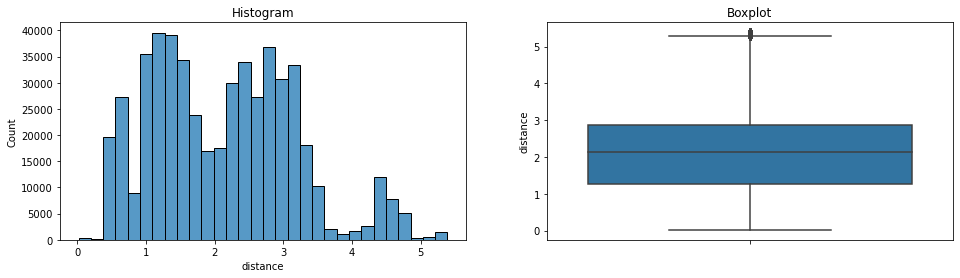


Skewness Value :  0.4513958253575312

Temperature - After Trimming


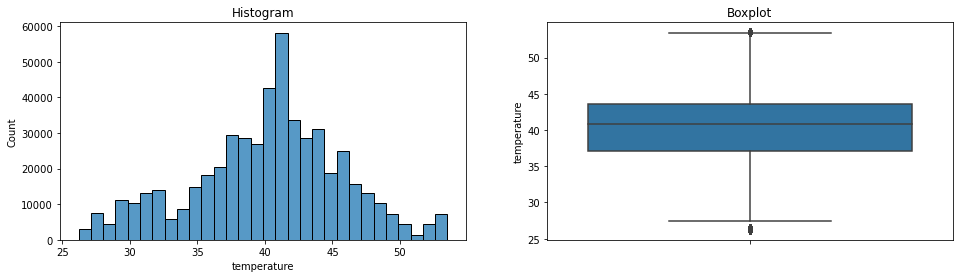


Skewness Value :  -0.2328885652838001


In [23]:
# Visualisasi data variable 'distance' dan 'temperature' setelah outlier dihilangkan

print('Distance - After Trimming')
diagnostic_plots(X_train_trimmed, 'distance')
print('\nSkewness Value : ', X_train_trimmed['distance'].skew())

print('\nTemperature - After Trimming')
diagnostic_plots(X_train_trimmed, 'temperature')
print('\nSkewness Value : ', X_train_trimmed['temperature'].skew())

Setelah dilakukan trimming pada 'distance' dan 'temperature', dapat diketahui nilai skewness pada 'distance' adalah 0.45 dan pada 'temperature' adalah -0.23, yang menunjukkan bahwa data telah terdistribusi secara normal. Lalu pada grafik boxplot, dapat dilihat bahwa sudah tidak ada data outlier pada 'distance' dan 'temperature'.

## V.4 Handling Missing Values

In [24]:
# Mengecek missing value pada X_train

X_train.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
date/time                      0
timezone                       0
origin                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

In [25]:
# Mengecek missing value pada X_test

X_test.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
date/time                      0
timezone                       0
origin                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

In [26]:
# Mengecek Missing Value di y_train

jml_mv = y_train.isnull().sum()
print('Jumlah Missing Value di y_train     : ', jml_mv)

# Mengecek Missing Value di y_test

jml_mv1 = y_test.isnull().sum()
print('Jumlah Missing Value di y_test      : ', jml_mv1)

Jumlah Missing Value di y_train     :  44051
Jumlah Missing Value di y_test      :  11043


In [27]:
# Menangangi missing value dengan melakukan imputasi dengan nilai median

median_y_train = y_train.median()
y_train = y_train.fillna(median_y_train)

median_y_test = y_test.median()
y_test = y_test.fillna(median_y_test)

# Mengecek jumlah missing value pada y_train dan y_test

jml_ = y_train.isnull().sum()
print('Jumlah Missing Value di y_train : ', jml_)

jml_1 = y_test.isnull().sum()
print('Jumlah Missing Value di y_test  : ', jml_1)

Jumlah Missing Value di y_train :  0
Jumlah Missing Value di y_test  :  0


Berdasarkan data-data di atas, dapat diketahui bahwa tidak ada missing value pada X_train dan X_test. Tetapi, pada data y_train dan y_test terdapat 44051 dan 11043 missing value. Setelah dilakukan imputasi dengan nilai median, sudah tidak ada missing value pada y_train dan y_test.

## V.5 Feature Selection

In [28]:
# Menampilkan data X_train

X_train

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
398306,96c6e374-d6dc-4eb9-bf69-75ceebda6155,1.545149e+09,16,18,12,2018-12-18 16:05:08,America/New_York,Theatre District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
180205,5beafea4-1c78-4d34-b78a-efc0b737be78,1.545007e+09,0,17,12,2018-12-17 00:40:06,America/New_York,South Station,Back Bay,Uber,...,0.1254,1544979600,38.94,1544954400,43.73,1544990400,33.99,1545019200,38.39,1544986800
390618,8910c82c-3067-4402-bc9c-308572a5735e,1.545140e+09,13,18,12,2018-12-18 13:35:08,America/New_York,Fenway,Beacon Hill,Uber,...,0.0028,1545152400,23.05,1545192000,38.00,1545109200,11.81,1545134400,31.89,1545109200
160752,2d61ed0d-643f-44d7-9f97-9fc2d576923a,1.543529e+09,22,29,11,2018-11-29 22:03:05,America/New_York,Fenway,Back Bay,Lyft,...,0.0000,1543510800,35.07,1543550400,44.68,1543510800,30.92,1543550400,38.34,1543510800
663548,e1e6b3aa-40f6-4b6f-90ab-622b91dfae3f,1.543441e+09,21,28,11,2018-11-28 21:35:07,America/New_York,South Station,Theatre District,Uber,...,0.0000,1543420800,33.70,1543399200,42.60,1543438800,29.88,1543399200,36.56,1543435200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138315,92fc63c9-5fc1-409b-abb0-a78ab828f552,1.543328e+09,14,27,11,2018-11-27 14:06:22,America/New_York,Boston University,Back Bay,Lyft,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
457217,4f08e9cc-ce50-425c-ae2d-4715feae0dba,1.543725e+09,4,2,12,2018-12-02 04:33:03,America/New_York,Beacon Hill,Northeastern University,Uber,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
349465,70fdaa49-5040-4bc1-8467-851d602d0c15,1.543866e+09,19,3,12,2018-12-03 19:48:07,America/New_York,North End,West End,Uber,...,0.0004,1543852800,42.83,1543896000,57.52,1543852800,39.65,1543896000,56.85,1543852800
195949,8501e23e-48d4-4bc1-ac7d-a0f958e4e7ca,1.544924e+09,1,16,12,2018-12-16 01:30:04,America/New_York,South Station,Theatre District,Lyft,...,0.0074,1544893200,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800


Berdasarkan personal judgement, kolom yang memiliki hubungan dengan `price` adalah kolom:
- `distance` 
- `surge_multiplier`
- `cab_type`

Karena menurut saya, nilai harga akan sesuai dengan jarak yang ditempuh dan `cab_type` yang dipesan, yaitu Uber atau Lyft dan kolom `surge_multiplier` memiliki hubungan dengan `price` adalah karena `surge_multiplier` adalah nilai pengali untuk `price`. Jadi jika terjadi permintaan meningkat dan harga lonjakan berlaku, maka nilai `surge_multiplier` akan berubah, dan `price` akan berubah sesuai dengan hasil perkalian harga awal dengan `surge_multiplier`.  Maka selain ketiga kolom tersebut, kolom-kolom lainnya akan dihapus.

In [29]:
# Menghapus kolom-kolom yang tidak digunakan pada X_train

X_train = X_train[['distance', 'surge_multiplier', 'cab_type']]
X_train

,distance,surge_multiplier,cab_type
398306,3.18,1.00,Lyft
180205,1.89,1.00,Uber
390618,2.96,1.00,Uber
160752,1.54,1.00,Lyft
663548,1.30,1.00,Uber
...,...,...,...
138315,1.49,1.25,Lyft
457217,1.92,1.00,Uber
349465,1.11,1.00,Uber
195949,1.20,1.00,Lyft


In [30]:
# Menghapus kolom-kolom yang tidak digunakan pada X_test

X_test = X_test[['distance', 'surge_multiplier', 'cab_type']]
X_test

,distance,surge_multiplier,cab_type
361725,3.22,1.0,Uber
341577,2.27,1.0,Uber
635503,1.78,1.0,Lyft
226218,4.44,1.0,Lyft
99235,1.30,1.0,Uber
...,...,...,...
157920,1.41,1.0,Uber
164225,0.54,1.0,Uber
498969,2.66,1.0,Uber
39021,2.34,1.0,Uber


## V.6 Memisahkan antara Kolom Numerikal dan Kolom Kategorikal

In [31]:
# Mendapatkan kolom numerikan dan kolom kategorikal

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns di X_train   : ', num_columns)
print('Categorical Columns di X_train : ', cat_columns)

num_columns1 = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns1 = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns di X_test    : ', num_columns1)
print('Categorical Columns di X_test  : ', cat_columns1)

Numerical Columns di X_train   :  ['distance', 'surge_multiplier']
Categorical Columns di X_train :  ['cab_type']
Numerical Columns di X_test    :  ['distance', 'surge_multiplier']
Categorical Columns di X_test  :  ['cab_type']


In [32]:
# Memisahkan Train-set dan Test-set berdasarkan tipe kolom

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_test_num

,distance,surge_multiplier
361725,3.22,1.0
341577,2.27,1.0
635503,1.78,1.0
226218,4.44,1.0
99235,1.30,1.0
...,...,...
157920,1.41,1.0
164225,0.54,1.0
498969,2.66,1.0
39021,2.34,1.0


## V.7 Feature Scaling

In [33]:
# Feature Scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.40306122, 0.        ],
       [0.23852041, 0.        ],
       [0.375     , 0.        ],
       ...,
       [0.13903061, 0.        ],
       [0.1505102 , 0.        ],
       [0.36607143, 0.        ]])

## V.8 Feature Encoding


In [34]:
# Feature Encoding menggunakan Label Encoding

labelencoder = LabelEncoder()
X_train_cat_encoded = labelencoder.fit_transform(X_train_cat)
X_train_cat_encoded = X_train_cat_encoded[:, np.newaxis]
X_test_cat_encoded = labelencoder.fit_transform(X_test_cat)
X_test_cat_encoded = X_test_cat_encoded[:, np.newaxis]

X_train_cat_encoded

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

## V.9 Menggabungkan Kolom Numerikal dan Kolom Kategorikal

In [35]:
# Menggabungkan kolom numerikal dan kategorikal

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.40306122, 0.        , 0.        ],
       [0.23852041, 0.        , 1.        ],
       [0.375     , 0.        , 1.        ],
       ...,
       [0.13903061, 0.        , 1.        ],
       [0.1505102 , 0.        , 0.        ],
       [0.36607143, 0.        , 0.        ]])

In [36]:
# Membuat dataframe baru, X_train_final_df

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,distance,surge_multiplier,cab_type
0,0.403061,0.000,0.0
1,0.238520,0.000,1.0
2,0.375000,0.000,1.0
3,0.193878,0.000,0.0
4,0.163265,0.000,1.0
...,...,...,...
554443,0.187500,0.125,0.0
554444,0.242347,0.000,1.0
554445,0.139031,0.000,1.0
554446,0.150510,0.000,0.0


In [37]:
# Membuat dataframe baru, X_test_final_df

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_test_final_df

,distance,surge_multiplier,cab_type
0,0.408163,0.0,1.0
1,0.286990,0.0,1.0
2,0.224490,0.0,0.0
3,0.563776,0.0,0.0
4,0.163265,0.0,1.0
...,...,...,...
138608,0.177296,0.0,1.0
138609,0.066327,0.0,1.0
138610,0.336735,0.0,1.0
138611,0.295918,0.0,1.0


# VI. Model Definition

In [38]:
# Definisi model yang digunakan

model_lin_reg = LinearRegression()

Algoritma yang dipakai adalah Linear Regression, karena tujuan dari model ini adalah untuk melakukan estimasi terhadap suatu variabel dan dapat menentukan seberapa besar pengaruh yang diberikan oleh suatu variabel independen terhadap variabel dependen.

Matriks yang akan dipakai adalah Mean Absolute Error (MAE), karena MAE digunakan untuk mengukur keakuratan suatu model dalam melakukan prediksi. 

# VII. Model Training

In [39]:
# Melakukan model training

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# VIII. Model Evaluation

In [40]:
# Melakukan prediksi pada train-set dan test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

#Data y_pred_train

y_pred_train

array([19.17776804, 14.69829909, 17.41600665, ..., 12.71716648,
       14.14873911, 18.4411931 ])

In [64]:
# Data y_pred_test

y_pred_test

array([18.07638418, 15.66346626, 15.621889  , ..., 16.65403257,
       15.84126021, 12.23458289])

In [41]:
# Model Evaluation dengan menggunakan MAE

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  6.564279561862003
Error - Test Set  :  6.582490118963659


Berdasarkan data di atas, rata-rata Error untuk Train-Set adalah 6.56 dan untuk Test-Set adalah 6.58. Maka bisa dikatakan bahwa errornya rendah, karena hanya terdapat error sekitar 6.


In [42]:
# Save file untuk data inference

with open('model_lin_reg.pkl', 'wb') as file_1:
    joblib.dump(model_lin_reg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
    joblib.dump(labelencoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
    json.dump(num_columns, file_4)

with open('list_cat_columns.txt', 'w') as file_5:
    json.dump(cat_columns, file_5)

# IX. Model Inference


In [43]:
# Mengakses file yang telah di-save untuk data inference

with open('model_lin_reg.pkl', 'rb') as file_1:
    model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
    model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
    list_num_cols = json.load(file_4)

with open('list_cat_columns.txt', 'rb') as file_5:
    list_cat_columns = json.load(file_5)

In [44]:
# Menampilkan data inference-set

dt_inf

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,07fa655a-6d14-493d-a327-82b9975f23fd,1.543622e+09,23,30,11,2018-11-30 23:48:04,America/New_York,Financial District,South Station,Uber,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
1,989cd358-bd98-4721-8f44-d5545bace91d,1.543550e+09,3,30,11,2018-11-30 03:48:05,America/New_York,Financial District,Haymarket Square,Lyft,...,0.0000,1543510800,35.02,1543550400,44.80,1543510800,30.81,1543550400,38.51,1543510800
2,2d0fe69e-4a02-4dff-8d06-0d8728dc9525,1.545150e+09,16,18,12,2018-12-18 16:25:09,America/New_York,Financial District,Boston University,Lyft,...,0.0028,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200
3,3423fd48-90f5-4ade-bdf5-e1041a0eb914,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,North Station,Haymarket Square,Lyft,...,0.0028,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200
4,b408b575-3120-4ca3-ab7b-54577f04d357,1.543341e+09,17,27,11,2018-11-27 17:51:23,America/New_York,Fenway,Financial District,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
5,1b2ace02-9644-4b61-89a2-766764c5f780,1.543829e+09,9,3,12,2018-12-03 09:18:04,America/New_York,North Station,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
6,789f1a48-6800-441e-893f-8a9f1edc23e4,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,South Station,Back Bay,Uber,...,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
7,48a12c63-427e-4757-921e-2caedc9d6ef7,1.543899e+09,4,4,12,2018-12-04 04:48:02,America/New_York,Financial District,North End,Lyft,...,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800
8,2d87519c-9686-4d1d-9d12-f36e2bf0ec01,1.544958e+09,10,16,12,2018-12-16 10:55:10,America/New_York,North Station,Fenway,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
9,dc2d93b2-1776-4d31-ae03-580179369cbc,1.544868e+09,10,15,12,2018-12-15 10:00:10,America/New_York,Back Bay,Fenway,Lyft,...,0.0087,1544893200,39.44,1544929200,54.38,1544896800,36.56,1544929200,53.71,1544896800


In [45]:
# Memisahkan antara Kolom Numerikal dan Kolom Kategorikal

dt_inf_num = dt_inf[list_num_cols]
dt_inf_cat = dt_inf[list_cat_columns]

# Data dt_inf_num

dt_inf_num

,distance,surge_multiplier
0,0.39,1.00
1,1.15,1.25
2,5.34,1.00
3,0.72,1.00
4,4.33,1.00
5,3.09,1.00
6,1.89,1.00
7,1.01,1.00
8,3.05,1.00
9,1.40,1.00


In [46]:
# Data dt_inf_cat

dt_inf_cat

,cab_type
0,Uber
1,Lyft
2,Lyft
3,Lyft
4,Lyft
5,Lyft
6,Uber
7,Lyft
8,Uber
9,Lyft


In [47]:
# Feature Scaling dan Feature Encoding

dt_inf_num_scaled = model_scaler.transform(dt_inf_num)
dt_inf_cat_encoded = model_encoder.transform(dt_inf_cat)
dt_inf_cat_encoded = dt_inf_cat_encoded[:, np.newaxis]

# Menampilkan data yang telah di-scaling

dt_inf_num_scaled

array([[0.04719388, 0.        ],
       [0.14413265, 0.125     ],
       [0.67857143, 0.        ],
       [0.08928571, 0.        ],
       [0.5497449 , 0.        ],
       [0.39158163, 0.        ],
       [0.23852041, 0.        ],
       [0.12627551, 0.        ],
       [0.38647959, 0.        ],
       [0.17602041, 0.        ]])

In [48]:
# Menampilkan data yang telah di-encoding

dt_inf_cat_encoded

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [49]:
# Menggabungkan Kolom Numerikal dan Kolom Kategorikal

dt_inf_final = np.concatenate ([dt_inf_num_scaled, dt_inf_cat_encoded], axis=1)
dt_inf_final

array([[0.04719388, 0.        , 1.        ],
       [0.14413265, 0.125     , 0.        ],
       [0.67857143, 0.        , 0.        ],
       [0.08928571, 0.        , 0.        ],
       [0.5497449 , 0.        , 0.        ],
       [0.39158163, 0.        , 0.        ],
       [0.23852041, 0.        , 1.        ],
       [0.12627551, 0.        , 0.        ],
       [0.38647959, 0.        , 1.        ],
       [0.17602041, 0.        , 0.        ]])

In [50]:
# Melakukan prediksi dengan Linear Regression

y_pred_inf = model_lin_reg.predict(dt_inf_final)
y_pred_inf

array([10.88842868, 19.49572782, 24.66398143, 12.92958058, 22.09866869,
       18.94917582, 14.69829909, 13.66615552, 17.64459887, 14.65672183])

In [51]:
# Membuat dataframe hasil Price's Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['Price Prediction'])
y_pred_inf_df

,Price Prediction
0,10.888429
1,19.495728
2,24.663981
3,12.929581
4,22.098669
5,18.949176
6,14.698299
7,13.666156
8,17.644599
9,14.656722


In [63]:
# Menggabungkan data inference-set dengan Price's prediction

df_akhir = pd.concat([dt_inf, y_pred_inf_df], axis=1)
df_akhir

,id,timestamp,hour,day,month,date/time,timezone,origin,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price Prediction
0,07fa655a-6d14-493d-a327-82b9975f23fd,1.543622e+09,23,30,11,2018-11-30 23:48:04,America/New_York,Financial District,South Station,Uber,...,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000,10.888429
1,989cd358-bd98-4721-8f44-d5545bace91d,1.543550e+09,3,30,11,2018-11-30 03:48:05,America/New_York,Financial District,Haymarket Square,Lyft,...,1543510800,35.02,1543550400,44.80,1543510800,30.81,1543550400,38.51,1543510800,19.495728
2,2d0fe69e-4a02-4dff-8d06-0d8728dc9525,1.545150e+09,16,18,12,2018-12-18 16:25:09,America/New_York,Financial District,Boston University,Lyft,...,1545152400,23.26,1545192000,38.11,1545109200,11.99,1545134400,32.05,1545109200,24.663981
3,3423fd48-90f5-4ade-bdf5-e1041a0eb914,1.545156e+09,18,18,12,2018-12-18 18:00:09,America/New_York,North Station,Haymarket Square,Lyft,...,1545152400,23.09,1545192000,38.03,1545109200,11.82,1545134400,31.92,1545109200,12.929581
4,b408b575-3120-4ca3-ab7b-54577f04d357,1.543341e+09,17,27,11,2018-11-27 17:51:23,America/New_York,Fenway,Financial District,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,22.098669
5,1b2ace02-9644-4b61-89a2-766764c5f780,1.543829e+09,9,3,12,2018-12-03 09:18:04,America/New_York,North Station,Boston University,Lyft,...,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800,18.949176
6,789f1a48-6800-441e-893f-8a9f1edc23e4,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,South Station,Back Bay,Uber,...,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800,14.698299
7,48a12c63-427e-4757-921e-2caedc9d6ef7,1.543899e+09,4,4,12,2018-12-04 04:48:02,America/New_York,Financial District,North End,Lyft,...,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800,13.666156
8,2d87519c-9686-4d1d-9d12-f36e2bf0ec01,1.544958e+09,10,16,12,2018-12-16 10:55:10,America/New_York,North Station,Fenway,Uber,...,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,17.644599
9,dc2d93b2-1776-4d31-ae03-580179369cbc,1.544868e+09,10,15,12,2018-12-15 10:00:10,America/New_York,Back Bay,Fenway,Lyft,...,1544893200,39.44,1544929200,54.38,1544896800,36.56,1544929200,53.71,1544896800,14.656722


In [61]:
# Melihat perbandingan data aktual 'price' dengan 'Price Prediction'

df_akhir[['price', 'Price Prediction']]

,price,Price Prediction
0,8.5,10.888429
1,16.5,19.495728
2,38.5,24.663981
3,16.5,12.929581
4,22.5,22.098669
5,22.5,18.949176
6,NaN,14.698299
7,3.5,13.666156
8,18.5,17.644599
9,16.5,14.656722


Berdasarkan data di atas, diketahui terdapat perbedaan antara nilai aktual harga dengan nilai prediksi harga. Di nilai aktual 'price' senilai 8.5, tetapi di 'Price Prediction' nilainya adalah 10.8. Hal ini bisa disebabkan oleh nilai error dan adanya kesalahan dalam penentuan variabel independen dan variabel dependen yang digunakan untuk analisis.

# X. Pengambilan Kesimpulan
Berdasarkan data-data di atas, dapat disimpulkan bahwa:
- Terdapat 307408 data untuk Lyft dan 385663 data untuk Uber. Rata-rata jarak yang ditempuh oleh Lyft adalah sekitar 2.18 km, sedangkan untuk Uber adalah sekitar 2.19 km. Lalu, rata-rata harga Lyft adalah sebesar $17.3 dan untuk Uber adalah $15.7. 
- Data untuk price memiliki distribusi yang tidak normal, sehingga data tidak terdistribusi secara merata. Dan untuk grafik persebaran data distance dan price, dapat dilihat bahwa terdapat beberapa data outlier.
- Setelah dilakukan perhitungan MAE, diketahui bahwa rata-rata Error untuk Train-Set adalah 6.56 dan untuk Test-Set adalah 6.58. Maka bisa dikatakan bahwa errornya rendah, karena hanya terdapat error sekitar 6.
- Berdasarkan hasil pengujian, diketahui terdapat perbedaan antara nilai aktual harga dengan nilai prediksi harga. Di nilai aktual 'price' senilai 8.5, tetapi di 'Price Prediction' nilainya adalah 10.8. Hal ini bisa disebabkan oleh nilai error dan penentuan variabel yang digunakan untuk analisis.

---
# Conceptual Problems

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression!
> Asumsi yang dipakai oleh Linear Regression adalah:
>- Untuk setiap nilai X (features), ada nilai y (target) yang sesuai. Karena linear regression adalah analisis sample berpasangan, jadi setiap nilai y pada satu sample, selalu ada nilai X.
>- Jumlah data pada X (features) dan y (target) harus sama, karena jika tidak sama, tidak akan bisa dilakukan train-test split.
>- Nilai data train-set harus lebih besar dari nilai data test-set.
>- Tidak ada multikolinieritas sempurna. Tidak ada hubungan linear yang sempurna di antara variabel penjelas (independen).

2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun!
> Nilai intercept adalah nilai rata-rata pada variabel Y (target) jika nilai variabel X (features) sama dengan 0. Sedangkan nilai slope adalah suatu nilai yang menunjukkan seberapa besar kontribusi / pengaruh yang diberikan oleh suatu variabel X (features) terhadap variabel Y (target). Berikut ini merupakan nilai intercept dan slope pada model:

In [55]:
# Melihat nilai Intercept and Slope

print('Nilai Intercept : ', model_lin_reg.intercept_)
print('Nilai Slope     : ', model_lin_reg.coef_)

Nilai Intercept :  11.151641053834815
Nilai Slope     :  [19.91292266 43.79187516 -1.2029804 ]


In [56]:
# Menampilkan semua kolom pada X_train_final_df

X_train_final_df.columns

MultiIndex([(        'distance',),
            ('surge_multiplier',),
            (        'cab_type',)],
           )

> Berdasarkan data di atas, dapat diketahui bahwa nilai intercept pada model yang dibuat adalah sekitar 11.15 dan variabel yang paling mempengaruhi 'price' pada model ini adalah 'surge_multiplier', karena variabel tersebut memiliki nilai slope terbesar, yaitu sekitar 43.7. Setelah itu diikuti oleh variabel 'distance', dengan nilai slope sebesar 19.9. Dan terakhir variabel 'cab_type' dengan nilai slope -1.2, yang berarti tidak terlalu mempengaruhi 'price'.